In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Fish_dataset.csv')

In [3]:
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [4]:
df.tail()

,Species,Weight,Length1,Length2,Length3,Height,Width
154,Smelt,12.2,11.5,12.2,13.4,2.0904,1.3936
155,Smelt,13.4,11.7,12.4,13.5,2.4300,1.2690
156,Smelt,12.2,12.1,13.0,13.8,2.2770,1.2558
157,Smelt,19.7,13.2,14.3,15.2,2.8728,2.0672
158,Smelt,19.9,13.8,15.0,16.2,2.9322,1.8792


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [6]:
df.isnull().sum()

Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64

In [8]:
df.shape

(159, 7)

In [19]:
df.describe()

,Weight,Length1,Length2,Length3,Height,Width
count,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
mean,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500
max,1650.000000,59.000000,63.400000,68.000000,18.957000,8.142000


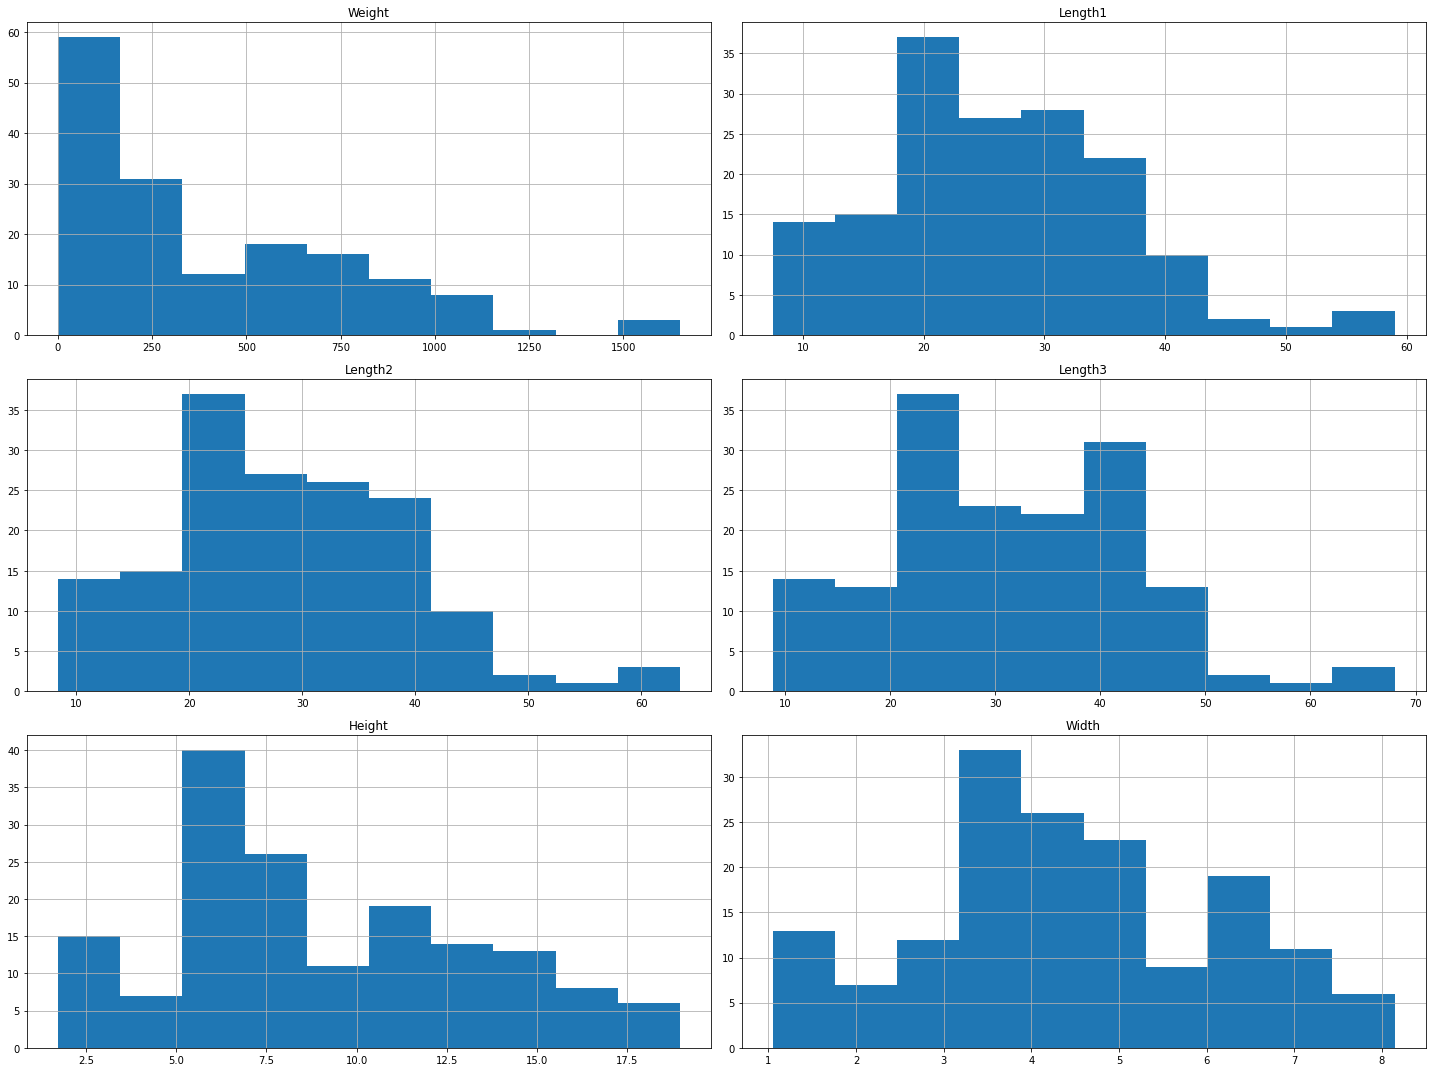

In [21]:
df.hist(bins=10,figsize=(20,15))
plt.tight_layout()

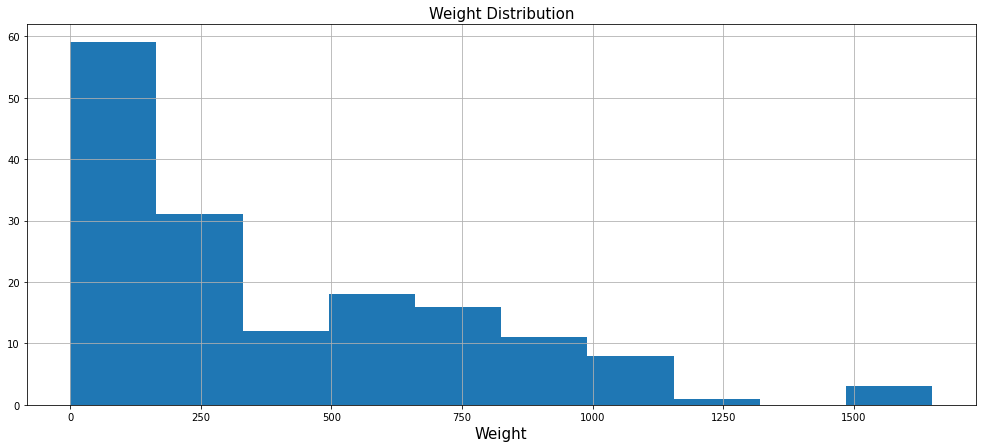

In [24]:
df['Weight'].hist(bins=10,figsize=(17,7))
plt.xlabel("Weight", fontsize=15)
plt.title("Weight Distribution", fontsize=15);

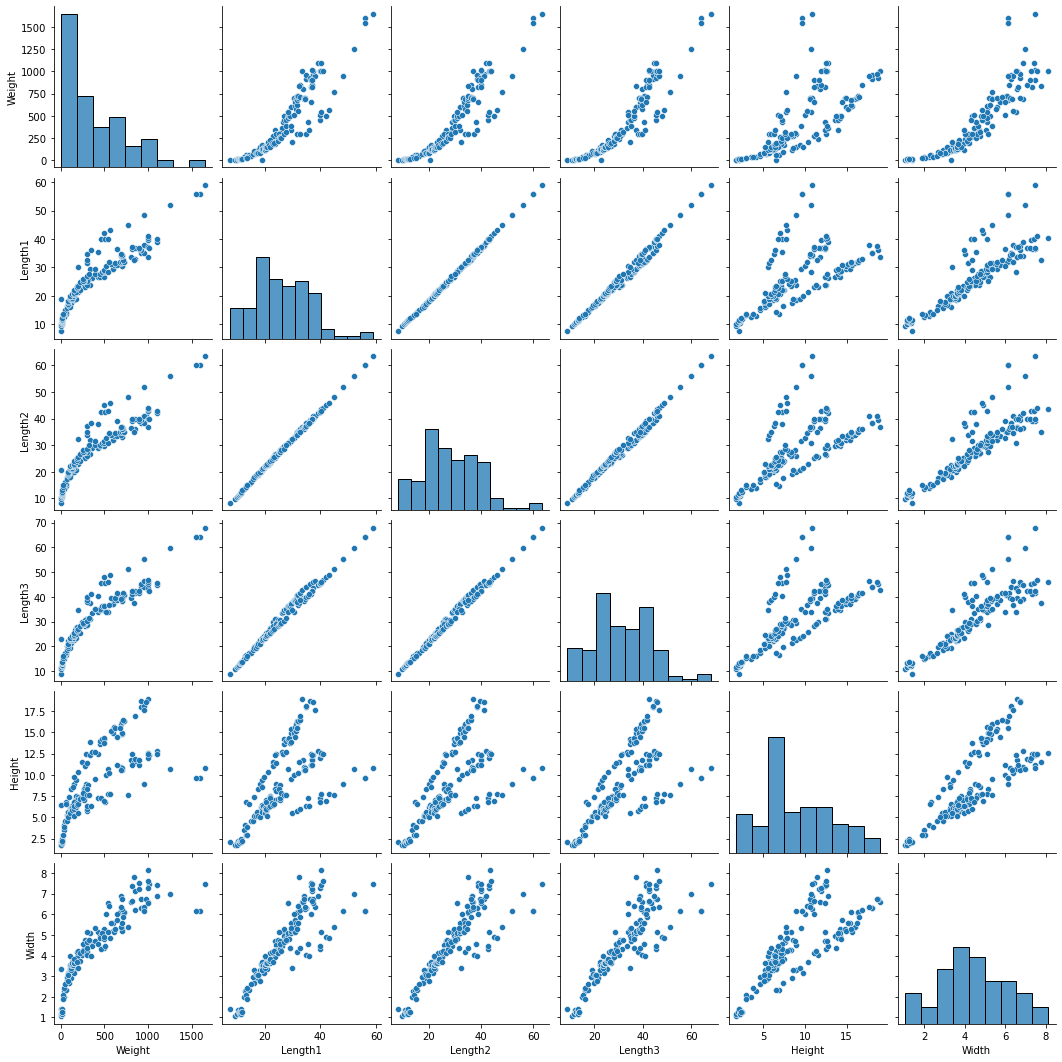

In [26]:
sns.pairplot(df);

In [27]:
df.corr()

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.915712,0.918618,0.923044,0.724345,0.886507
Length1,0.915712,1.000000,0.999517,0.992031,0.625378,0.867050
Length2,0.918618,0.999517,1.000000,0.994103,0.640441,0.873547
Length3,0.923044,0.992031,0.994103,1.000000,0.703409,0.878520
Height,0.724345,0.625378,0.640441,0.703409,1.000000,0.792881
Width,0.886507,0.867050,0.873547,0.878520,0.792881,1.000000


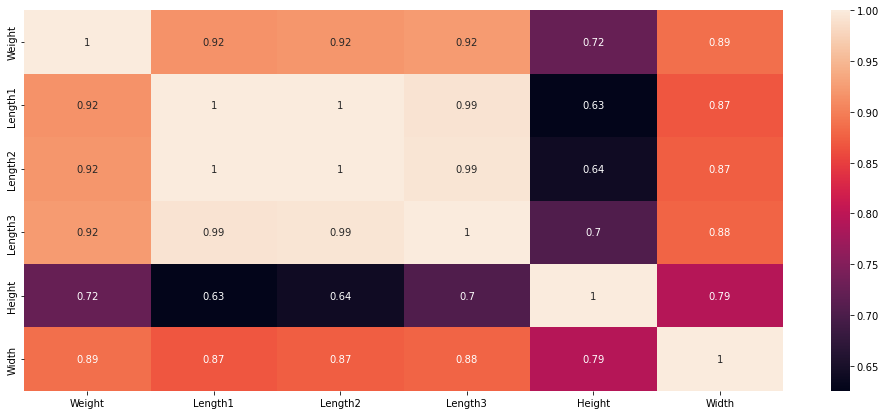

In [28]:
plt.figure(figsize=(17,7))
sns.heatmap(df.corr(),annot=True);

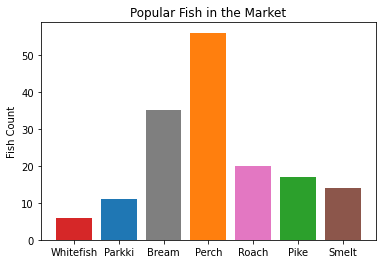

In [17]:
#Q1

fig, ax = plt.subplots()


fish = ['Whitefish','Parkki','Bream','Perch','Roach','Pike','Smelt']
counts = [6, 11, 35, 56, 20, 17, 14]
bar_labels = ['red', 'blue', 'grey', 'orange', 'pink', 'green','brown']
bar_colors = ['tab:red', 'tab:blue', 'tab:grey', 'tab:orange','tab:pink', 'tab:green','tab:brown']

ax.bar(fish, counts, label=bar_labels, color=bar_colors)

ax.set_ylabel('Fish Count')
ax.set_title('Popular Fish in the Market')


plt.show()

In [18]:
#Perch is the most popular fish in the market

In [33]:
#Q2
for colname,colvalues in df.iteritems():
    if df[colname].dtype!=object and colname!='Weight':
        Q1=df[colname].quantile(q=0.25)
        Q3=df[colname].quantile(q=0.75)
        IQR=Q3-Q1
        low=Q1-(1.5*IQR)
        up=Q3+(1.5*IQR)
        df.loc[(df[colname]<low) | (df[colname]>up) ,colname]=df[colname].median()
    else:
        continue

In [36]:
df_dummy=pd.get_dummies(df)

In [37]:
df.shape

(159, 7)

In [38]:
df_dummy.shape

(159, 13)

In [39]:
df_dummy.head()

,Weight,Length1,Length2,Length3,Height,Width,Species_Bream,Species_Parkki,Species_Perch,Species_Pike,Species_Roach,Species_Smelt,Species_Whitefish
0,242.0,23.2,25.4,30.0,11.5200,4.0200,1,0,0,0,0,0,0
1,290.0,24.0,26.3,31.2,12.4800,4.3056,1,0,0,0,0,0,0
2,340.0,23.9,26.5,31.1,12.3778,4.6961,1,0,0,0,0,0,0
3,363.0,26.3,29.0,33.5,12.7300,4.4555,1,0,0,0,0,0,0
4,430.0,26.5,29.0,34.0,12.4440,5.1340,1,0,0,0,0,0,0


In [42]:
from scipy.stats import shapiro
stat, p = shapiro(df.Weight)

print('Statistics=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p > alpha:
    print('The data is normally distributed (fail to reject Null)')
else:
    print('The data is not normally distributed (reject Null)')

Statistics=0.883, p-value=0.000
The data is not normally distributed (reject Null)


In [46]:
X = df_dummy.drop('Weight',axis=1)
Y = df_dummy['Weight']
X.shape

(159, 12)

In [47]:
from sklearn.preprocessing import StandardScaler
# define min max scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(X)

In [48]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(scaled,Y,test_size=0.2,random_state=42)

In [50]:
from sklearn.linear_model import LinearRegression
mlr_scaled = LinearRegression().fit(x_train, y_train)
mlr_scaled_predict=mlr_scaled.predict(x_test)

In [51]:
mlr_scaled.score(x_test, y_test)

0.9149855299275024

In [52]:
mlr_scaled.score(x_train, y_train)

0.9383112908990828

In [53]:
from sklearn import metrics 
print("R score",metrics.r2_score(y_test,mlr_scaled_predict))
print("MSE = ", metrics.mean_squared_error(y_test,mlr_scaled_predict))

R score 0.9149855299275024
MSE =  12092.397593847214
